In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle

### Import dataset

In [2]:
df = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/hybrid_planned_yield_dataset_all_seasons.csv').drop(columns = ['Unnamed: 0'])

print(display(df))

,Field_Name,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,Total_N,Total_P,Total_K,Season,Hybrid,Planned_Yield_kg_per_ha
0,M6I2035,-220.35,14.0,2.500000,3049.333333,205.5,48.0,48.0,WINTER,DKB335PRO3,4700.0
1,M6I2036,3847.21,18.0,2.500000,3575.055556,492.0,216.0,216.0,WINTER,DKB335PRO3,4700.0
2,M6I2037,415.52,13.0,2.500000,3116.200000,198.0,60.0,60.0,WINTER,DKB335PRO3,4700.0
3,M6I2009,724.51,9.0,2.500000,7678.888889,202.4,95.2,96.0,WINTER,AG8480PRO3,6300.0
4,M6I2010,502.10,9.0,2.500000,7756.363636,179.4,95.2,90.0,WINTER,AG8480PRO3,6300.0
...,...,...,...,...,...,...,...,...,...,...,...
915,M6I21197,-239.89,15.0,2.597851,4073.493976,92.0,0.0,0.0,WINTER,DKB360PRO3,5400.0
916,M6I21199,314.80,17.0,3.120000,6969.677419,184.0,0.0,0.0,WINTER,DKB360PRO3,5400.0
917,M6I21200,-312.82,19.0,2.930000,6969.636364,92.0,0.0,0.0,WINTER,DKB360PRO3,5400.0
918,M6I21201,485.73,17.0,3.240000,7954.666667,207.0,0.0,0.0,WINTER,DKB360PRO3,5800.0


None


### Value Count Per Hybrid

DKB360PRO3     65
DKB230PRO3     64
AG8480PRO3     64
AG8700PRO3     53
DKB265PRO3     44
DKB255PRO3     41
DKB290PRO3     37
AG9025PRO3     31
AS1868PRO3     29
AS1844PRO3     29
AS1666PRO3     26
DKB335PRO3     25
AS1820PRO3     25
DKB363PRO3     23
3500RR2        21
AG8780PRO3     21
AG9030PRO3     21
AS1633PRO3     19
3700RR2        18
AS1822PRO3     17
AG8088PRO2     17
AS1777PRO3     15
AG8061PRO2     13
AG1051         13
DKB177PRO3     13
AG8070PRO3     13
AG7098PRO2     13
AS1757PRO3     12
AG8065PRO3     10
AG7088PRO3     10
AG9000PRO3      8
AS1677PRO3      8
DKB390PRO4      7
DKB290TRE       7
AS1850PRO3      6
DKB240PRO3      6
AS1633PRO3I     6
DKB235PRO3      6
AG8700PRO4      5
AG8690PRO3      5
3110RR2         4
3320RR2         4
AS1730PRO3      4
3800RR2         4
AG8480PRO4      4
AG9050PRO3      4
AS1800PRO3      4
AG8780PRO4      3
AG7098TRE       3
2200RR2         3
DKB390PRO2      3
AG9035PRO3      2
AG8780PRO       2
AG9021PRO3      2
AG7088RR2       1
AG9040    

Text(0.5, 1.0, 'Histogram of Number of Fields Containing Particular Hybrid')

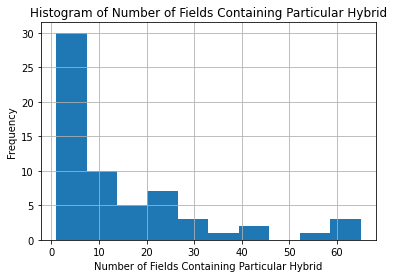

In [3]:
pd.set_option("display.max_rows", None)

print(df['Hybrid'].value_counts())

plt.figure()
df['Hybrid'].value_counts().hist()
plt.xlabel('Number of Fields Containing Particular Hybrid')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Fields Containing Particular Hybrid')

### Scatterplot and correlolgram for hybrid with most fields

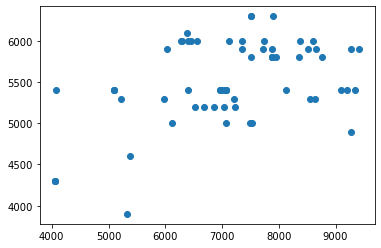

In [4]:
plt.scatter(df[df['Hybrid'] == 'DKB360PRO3']['Yield_kg_per_Ha'], df[df['Hybrid'] == 'DKB360PRO3']['Planned_Yield_kg_per_ha'])

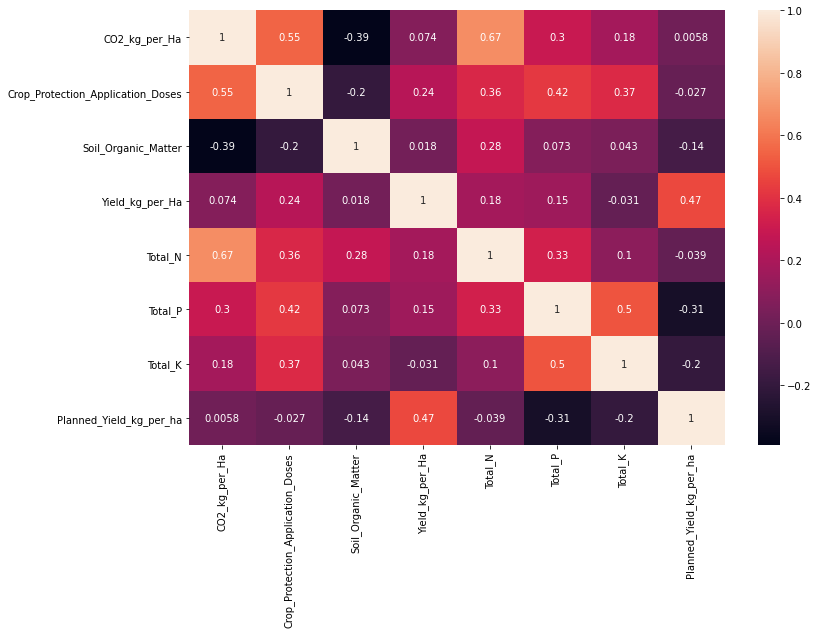

In [5]:
corr_matrix = df[df['Hybrid'] == 'DKB360PRO3'].corr()
plt.figure(figsize = (12, 8))
sn.heatmap(corr_matrix, annot = True)
sn.set(font_scale = .8)
plt.show()

In [6]:
X = df[df['Hybrid'] == 'DKB360PRO3'].reset_index(drop = True).drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Yield_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])

print(display(X))
y = df[df['Hybrid'] == 'DKB360PRO3'].reset_index(drop = True)['Yield_kg_per_Ha']
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Total_N,Total_P,Total_K
0,13.0,2.500000,74.25,0.00,0.0
1,15.0,2.470000,74.25,0.00,0.0
2,19.0,4.800000,208.30,104.00,132.0
3,15.0,2.500000,33.00,99.00,105.0
4,15.0,2.500000,206.00,78.00,90.0
5,15.0,2.500000,35.00,105.00,97.8
6,15.0,2.500000,33.00,99.00,96.0
7,15.0,2.500000,33.00,99.00,96.0
8,15.0,2.500000,33.00,99.00,0.0
9,15.0,2.500000,33.00,99.00,106.2


None
0.09534242005520399
[ 83.66449596 121.90894656   0.99688337   2.34620236  -4.59335984]
5200.539483549002


In [7]:
X = df[df['Hybrid'] == 'DKB230PRO3'].reset_index(drop = True).drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Yield_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])

print(display(X))
y = df[df['Hybrid'] == 'DKB230PRO3'].reset_index(drop = True)['Yield_kg_per_Ha']
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Total_N,Total_P,Total_K
0,20.0,2.500000,144.8300,1.5600,90.0000
1,18.0,2.300000,144.5000,0.0000,90.0000
2,17.0,2.700000,144.5000,0.0000,90.0000
3,18.0,2.200000,114.0000,0.0000,90.0000
4,21.0,1.900000,144.5000,0.0000,90.0000
5,15.0,2.200000,144.5000,0.0000,90.0000
6,15.0,2.726316,216.2000,0.0000,132.0000
7,15.0,4.366667,188.6000,0.0000,130.8000
8,14.0,4.057143,202.4000,0.0000,105.0000
9,11.0,4.187500,212.9800,0.0000,130.8000


None
0.16801582542940408
[-50.69174047 298.39001535   2.82541596  -6.52376167   4.12704473]
5741.301572713808


In [8]:
X = df[df['Hybrid'] == 'AG8480PRO3'].reset_index(drop = True).drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Yield_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])

print(display(X))
y = df[df['Hybrid'] == 'AG8480PRO3'].reset_index(drop = True)['Yield_kg_per_Ha']
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Total_N,Total_P,Total_K
0,9.0,2.500000,202.40,95.2,96.0
1,9.0,2.500000,179.40,95.2,90.0
2,10.0,2.500000,179.40,95.2,102.0
3,9.0,2.500000,207.85,122.6,138.0
4,10.0,2.500000,179.95,97.8,102.0
5,23.0,2.500000,217.00,156.0,90.0
6,19.0,2.500000,214.70,156.0,108.0
7,18.0,2.500000,25.30,119.6,120.0
8,19.0,2.500000,25.30,119.6,120.0
9,15.0,2.500000,25.30,119.6,120.0


None
0.13085202993461653
[ -99.61640913 -134.89839392    1.11759806   -6.68583431   -0.45519476]
9784.973180200352


In [9]:
class PredictorWithScalars:
    
    def __init__(self, predictor, X_scaler, y_scaler):
        self.predictor = predictor
        self.X_scaler = X_scaler
        self.y_scaler = y_scaler
    
    def transform_X(self, X):
        transformed_X = self.X_scaler.transform(X)
        return transformed_X
    
    def transform_y(self, y):
        transformed_y = self.y_scaler.transform(y)
        return transformed_y

    def predict(self, X):
        transformed_X = self.X_scaler.transform(X)
        transformed_y_preds = self.predictor.predict(transformed_X).reshape(-1,1)
        inverse_transformed_y_preds = self.y_scaler.inverse_transform(transformed_y_preds)
        return inverse_transformed_y_preds

### Linear Regression

In [16]:
# hybrids with > 19: ML approach with test set

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'WINTER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    standard_scaler_X = StandardScaler().fit(X_train)
    standard_scaler_y = StandardScaler().fit(y_train)
    
    reg = LinearRegression()
    
    predictorScaler = PredictorWithScalars(reg, standard_scaler_X, standard_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/winter_models_hybrid_level_linear.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         39        17 -0.852457  1703.678676  1367.457385
1         26        12 -0.236639  1941.842974  1614.000324
2         26        12 -0.035238  1635.543143  1347.533558
3         24        11  0.013570  2086.705785  1341.053357
4         20         9  0.035496  2055.271490  1434.220516
5         17         8 -0.366323  1625.040659  1315.354707
6         17         8 -1.870432  3191.248593  2478.217417
7         16         8 -1.057500  1925.486047  1648.998095
8         16         7 -2.171089  2903.058386  1980.604746


In [19]:
# hybrids with > 19: ML approach with test set

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'SUMMER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    standard_scaler_X = StandardScaler().fit(X_train)
    standard_scaler_y = StandardScaler().fit(y_train)
    
    reg = LinearRegression()
    
    predictorScaler = PredictorWithScalars(reg, standard_scaler_X, standard_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/summer_models_hybrid_level_linear.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         44        20  0.148108  1318.995937  1134.366469
1         21         9  0.118382  3723.941072  2980.471263
2         18         8 -2.912916  4217.081959  3257.496837
3         17         8  0.434287   857.712959   661.189954


In [72]:
print(len(df[df['Season'] == 'WINTER']['Hybrid'].value_counts()))
print(len(df[df['Season'] == 'SUMMER']['Hybrid'].value_counts()))

42
55


In [73]:
print(len(df['Hybrid'].value_counts()))

62


### LASSO

In [17]:
# hybrids with > 19: ML approach with test set
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'WINTER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    standard_scaler_X = StandardScaler().fit(X_train)
    standard_scaler_y = StandardScaler().fit(y_train)
    
    lasso = Lasso()
    
    param_grid = {'alpha': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]}
    
    grid_search = GridSearchCV(lasso, param_grid, cv = 5)

    predictorScaler = PredictorWithScalars(grid_search, standard_scaler_X, standard_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/winter_models_hybrid_level_lasso.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         39        17 -0.374954  1467.769114  1241.516031
1         26        12 -0.087311  1820.830308  1434.924845
2         26        12 -0.014827  1619.339524  1448.184238
3         24        11 -0.027762  2129.974808  1322.247640
4         20         9 -0.081102  2175.958164  1731.726204
5         17         8 -0.049456  1424.195749  1119.026749
6         17         8  0.157300  1729.113407  1649.368850
7         16         8 -0.336896  1552.098432  1349.983199
8         16         7 -0.021192  1647.423405  1484.031848


In [18]:
# hybrids with > 19: ML approach with test set
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'SUMMER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    standard_scaler_X = StandardScaler().fit(X_train)
    standard_scaler_y = StandardScaler().fit(y_train)
    
    lasso = Lasso()
    
    param_grid = {'alpha': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]}
    
    grid_search = GridSearchCV(lasso, param_grid, cv = 5)

    predictorScaler = PredictorWithScalars(grid_search, standard_scaler_X, standard_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/summer_models_hybrid_level_lasso.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         44        20 -0.077960  1483.721821  1352.591323
1         21         9  0.011216  3943.785962  3242.133972
2         18         8 -0.237989  2372.029590  2193.109577
3         17         8  0.045930  1113.868789   937.633186


### KNN

In [21]:
# hybrids with > 19: ML approach with test set
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'WINTER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    min_max_scaler_X = MinMaxScaler().fit(X_train)
    min_max_scaler_y = MinMaxScaler().fit(y_train)
    
    knn = KNeighborsRegressor()
    
    param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
    grid_search = GridSearchCV(knn, param_grid, cv = 5)

    predictorScaler = PredictorWithScalars(grid_search, min_max_scaler_X, min_max_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/winter_models_hybrid_level_knn.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         39        17 -0.508000  1537.143268  1184.437412
1         26        12 -0.208653  1919.744681  1372.710873
2         26        12 -0.076448  1667.778712  1466.413308
3         24        11 -0.024779  2126.881117  1347.778656
4         20         9  0.065096  2023.488709  1519.650231
5         17         8 -0.182087  1511.514785  1187.724661
6         17         8 -0.029711  1911.369776  1648.115540
7         16         8 -0.567847  1680.824375  1378.163390
8         16         7  0.108712  1539.077505  1205.539453


In [22]:
# hybrids with > 19: ML approach with test set
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'SUMMER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    min_max_scaler_X = MinMaxScaler().fit(X_train)
    min_max_scaler_y = MinMaxScaler().fit(y_train)
    
    knn = KNeighborsRegressor()
    
    param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    
    grid_search = GridSearchCV(knn, param_grid, cv = 5)

    predictorScaler = PredictorWithScalars(grid_search, min_max_scaler_X, min_max_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/summer_models_hybrid_level_knn.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         44        20  0.054848  1389.318758  1239.938126
1         21         9 -0.076996  4115.945595  3066.812176
2         18         8  0.003827  2127.792438  1792.582026
3         17         8  0.628838   694.745813   620.875580


### Subsetted Winter data KNN, not broken down by hybrid

In [29]:
# hybrids with > 19: ML approach with test set
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

df_presc = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/prescription_dataset.csv').drop(columns = ['Unnamed: 0'])

print(display(df_presc))

X = df_presc.drop(columns = ['Yield_kg_per_Ha'])
y = np.array(df_presc['Yield_kg_per_Ha']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

min_max_scaler_X = MinMaxScaler().fit(X_train)
min_max_scaler_y = MinMaxScaler().fit(y_train)

knn = KNeighborsRegressor()

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(knn, param_grid, cv = 5)

predictorScaler = PredictorWithScalars(grid_search, min_max_scaler_X, min_max_scaler_y)
predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))

y_preds = predictorScaler.predict(X_test)

r_squared = r2_score(y_test, y_preds)
rmse = mean_squared_error(y_test, y_preds, squared = False)
mean_abs_error = mean_absolute_error(y_test, y_preds)

print(r_squared, rmse, mean_abs_error)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,Total_N,Total_P,Total_K
0,14.0,2.500000,3049.333333,205.5000,48.0000,48.000
1,13.0,2.500000,3116.200000,198.0000,60.0000,60.000
2,9.0,2.500000,7678.888889,202.4000,95.2000,96.000
3,9.0,2.500000,7756.363636,179.4000,95.2000,90.000
4,10.0,2.500000,8235.200000,179.4000,95.2000,102.000
5,9.0,2.500000,8178.000000,207.8500,122.6000,138.000
6,10.0,2.500000,7470.315789,179.9500,97.8000,102.000
7,17.0,2.500000,8674.700000,177.5000,75.0000,140.000
8,15.0,2.500000,8771.363636,206.0000,104.0000,120.000
9,17.0,2.500000,7753.269231,196.8000,104.0000,120.000


None
0.07640872995640258 1907.153413579238 1495.2625614573953
